In [1]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

def calculate_coeff(theta):
    
    # gamma = 0.91
    # gamma = 0.895
    gamma = 0
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    norm = np.linalg.norm(coeff)
    
    coeff_result = coeff / norm
    
    return coeff_result
    # return coeff

In [2]:
# == Test if coeff is diff? == 

def With_norm(theta, gamma):
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    norm = np.linalg.norm(coeff)
    coeff_result = coeff / norm
    
    return coeff_result
    # return round_oper(coeff_result.numpy())

def Without_norm(theta):
    gamma = 0
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    
    return coeff
    # return round_oper(coeff.numpy())

def round_oper(coeff_in):
    coeff_round = np.zeros(2, dtype='complex_')
    
    for i in range(2):
        coeff_round[i] = round(coeff_in[i].real, 2) + round(coeff_in[i].imag, 2) * 1j
    
    return coeff_round

Num_of_samples = 100
t_var = (np.linspace(-2*np.pi, 2*np.pi, Num_of_samples))

meas_com = np.zeros(Num_of_samples)
save_norm = np.zeros(Num_of_samples,dtype=np.complex_)
save_without = np.zeros(Num_of_samples,dtype=np.complex_)

count = 0
for i in range(len(t_var)):
    meas_com[i] = ((With_norm(i,0)[0] == Without_norm(i)[0]) * (With_norm(i,0)[1] == Without_norm(i)[1]) )
    
    # if, different
    if meas_com[i] == 0:
        save_norm[count] = With_norm(i,0)[0]
        save_without[count] = Without_norm(i)[0]
        count = count+1
count = 0  
   
    
# Test for all coeff is same under gamma = 0 and theta = ~
print(meas_com)
while(save_norm[count] != 0):
    print('save_norm:', save_norm[count], ' save_without:', save_without[count])
    count = count +1
count = 0    


# coeff for all theta is same

[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1.]
save_norm: (0.9800851433251832+0.13970774909946296j)  save_without: (0.9800851433251829+0.13970774909946293j)
save_norm: (0.42724998309569334-0.494679123311691j)  save_without: (0.42724998309569323-0.4946791233116909j)
save_norm: (0.36241833097420156+0.4806987459397785j)  save_without: (0.3624183309742015+0.4806987459397784j)
save_norm: (0.22613536988786587-0.4183278192680281j)  save_without: (0.2261353698878658-0.418327819268028j)
save_norm: (0.8234596611643203-0.38127922523980146j)  save_without: (0.8234596611643201-0.38127922523980134j)
save_norm: (0.9171116802532553-0.27571334062084535j)  save_without: (0.9171116802532551-0.2757133406208453j)
save_norm: (0.992948290791275-0.0836778

In [3]:
# type(Without_norm(1))

In [4]:
# == Define qnode using state vector ==

dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit(theta):
    qml.QubitStateVector(calculate_coeff(theta), wires=range(1))
    
    return qml.probs()
    # return qml.density_matrix(wires=0)

print('Circuit_prob:',circuit(0))

circuit(0)

# fig, ax = qml.draw_mpl(circuit)(0)

Circuit_prob: [1. 0.]


tensor([1., 0.], requires_grad=True)

In [5]:
# Define new circuit for test
dev_with_out = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_with_out)
def circuit_without(theta):
    qml.QubitStateVector(Without_norm(theta).numpy(), wires=range(1))
    
    return qml.probs()
    # return qml.density_matrix(wires=0)


dev_with_norm = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_with_norm)
def circuit_with_norm(theta):
    qml.QubitStateVector(With_norm(theta,0).numpy(), wires=range(1))
    
    return qml.probs()
    # return qml.density_matrix(wires=0)

In [6]:
# == Test Qnode is same for all theta == 

Num_of_samples = 100
t_var = (np.linspace(-2*np.pi, 2*np.pi, Num_of_samples))

circuit_prob = np.zeros(Num_of_samples)

save_cir_norm = np.zeros(Num_of_samples)
save_cir_without = np.zeros(Num_of_samples)

count_circuit = 0 
for i in range(len(t_var)):
    circuit_prob[i] = (circuit_without(i)[0] == circuit_with_norm(i)[0]) * (circuit_without(i)[1] == circuit_with_norm(i)[1])
    
    if circuit_prob[i] == 0:
        save_cir_norm[count_circuit] = circuit_with_norm(i)[0]
        save_cir_without[count_circuit] = circuit_without(i)[0]
        
count_circuit = 0
    
# Test for all coeff is same under gamma = 0 and theta = ~
print(circuit_prob)

while(save_norm[count_circuit] != 0):
    print('save_cir_norm:', save_cir_norm[count_circuit], ' save_cir_without:', save_cir_without[count])
    count_circuit = count_circuit +1
count_circuit = 0    

meas_com == circuit_prob


[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1.]
save_cir_norm: 0.9847296833349942  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.9847296833349938
save_cir_norm: 0.0  save_cir_without: 0.984729683334

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True], requires_grad=True)

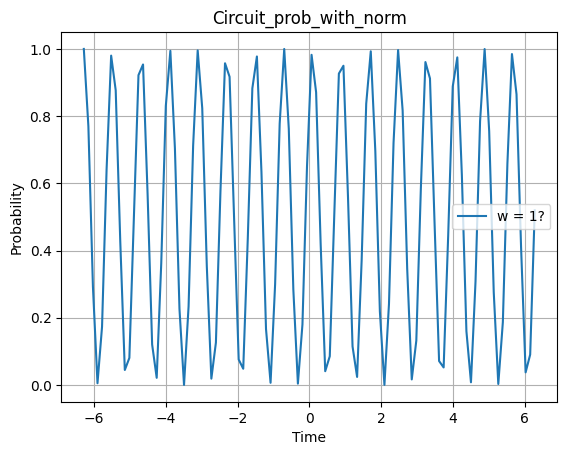

In [7]:
# Plot after norm circuit prob of [0]

number_of_samples = 100
t_variable = (np.linspace(-2*np.pi, 2*np.pi, number_of_samples))

meas_prob = np.zeros(number_of_samples)

for i in range(len(t_variable)):
    # 1/2 [1 - cos(w_0*t)]
    # meas_prob[i] = 1 - abs(circuit(t_variable[i]).numpy()[0])
    meas_prob[i] = circuit_with_norm(i)[0]
 
fig, ax = plt.subplots()
ax.plot(t_variable, meas_prob, label = 'w = 1?')
plt.title('Circuit_prob_with_norm')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid()

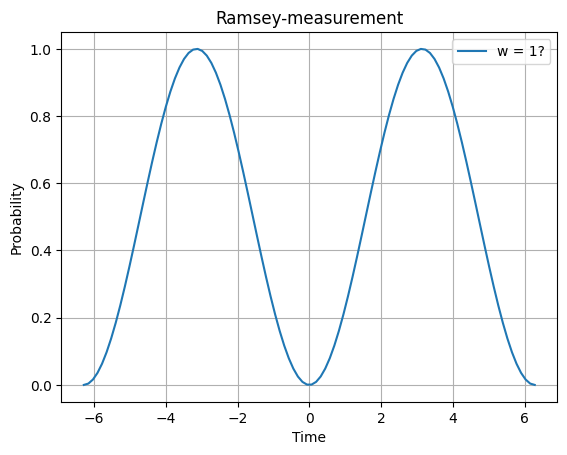

In [8]:
# == Plot for t ==

number_of_samples = 100
t_variable = (np.linspace(-2*np.pi, 2*np.pi, number_of_samples))

measurements = np.zeros(number_of_samples)

for i in range(len(t_variable)):
    # 1/2 [1 - cos(w_0*t)]
    # measurements[i] = 1 - abs(circuit(t_variable[i]).numpy()[0])
    measurements[i] = 1 - circuit(t_variable[i]).numpy()[0]
 
fig, ax = plt.subplots()
ax.plot(t_variable, measurements, label = 'w = 1?')
plt.title('Ramsey-measurement')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid()

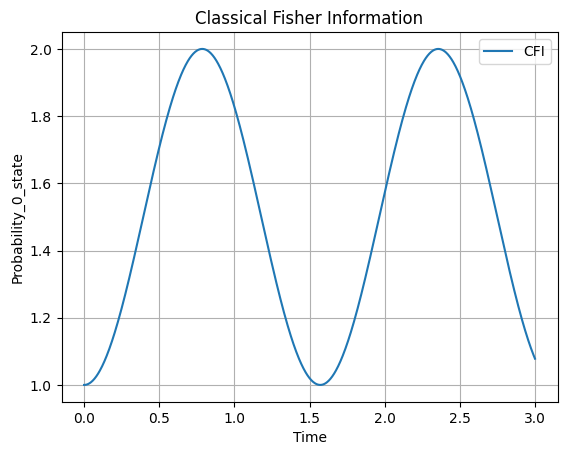

In [9]:
#  == Plot CFI for Ramsey measurement ==




N = 1000
tau_CFI = np.linspace(-0.001, 3.0, N)

CFI = np.zeros(N)

for i in range(len(tau_CFI)):
    CFI[i] = qml.qinfo.classical_fisher(circuit)(tau_CFI[i])
    # CFI[i] = qml.qinfo.quantum_fisher(circuit)(tau_CFI[i])

fig, ax = plt.subplots()
ax.plot(tau_CFI, CFI, label = 'CFI')
plt.title('Classical Fisher Information')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
plt.legend()
plt.grid()

# print(CFI)


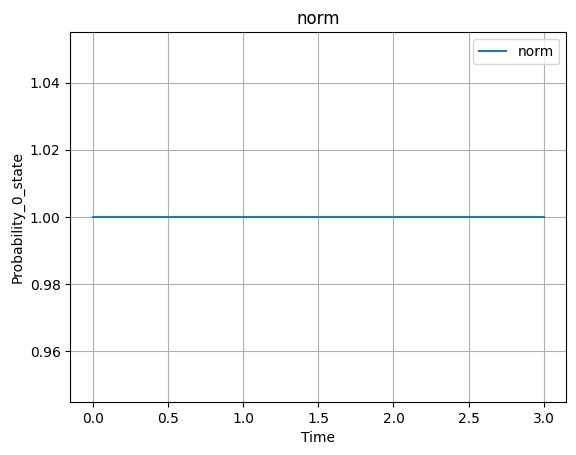

In [10]:
def calculate_coeff_1(theta):
    
    # gamma = 0.91
    # gamma = 0.895
    gamma = 0
    coeff = np.array([ (((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) )  / (1-gamma * (np.cos(theta)**2) ) , ((1-np.exp(-1.j * theta))/2) / (1-gamma * (np.cos(theta)**2) ) ]) 
    norm = np.linalg.norm(coeff)
    
    coeff_result = coeff / norm
    
    return norm
    # return coeff
    
    
N = 1000
tau_norm = np.linspace(-0.001, 3.0, N)

norm_list = np.zeros(N)

for i in range(len(tau_norm)):
    norm_list[i] = calculate_coeff_1(i)
    # norm_list[i] = qml.qinfo.quantum_fisher(circuit)(tau_norm[i])

fig, ax = plt.subplots()
ax.plot(tau_norm, norm_list, label = 'norm')
plt.title('norm')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
plt.legend()
plt.grid()

In [11]:
# == Test coeff_norm == 

def With_norm(theta, gamma):
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    norm = np.linalg.norm(coeff)
    coeff_result = coeff / norm
    
    return coeff_result

def Without_norm(theta):
    gamma = 0
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) )
    
    return coeff


meas_com = np.zeros(number_of_samples)
meas_norm = np.zeros(number_of_samples,dtype=np.complex_)
meas_without = np.zeros(number_of_samples,dtype=np.complex_)

for i in range(len(t_variable)):
    # 1/2 [1 - cos(w_0*t)]
    # meas_11[i] = 1 - abs(circuit(t_variable[i]).numpy()[0])
    meas_com[i] = ((With_norm(i,0)[0] == Without_norm(i)[0]) * (With_norm(i,0)[1] == Without_norm(i)[1]) )
    # meas_norm[i] = With_norm(i,0)[0]
    # meas_without[i] = Without_norm(i)[0]
    # meas_norm[i] = With_norm(i,0)[0]
    

    
print(meas_com)
# print(meas_norm)
# print('\n')

# print(meas_without)
    
# Gamma = 0
# print(meas_11)
 
 
 

[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1.]
